# Twitter Sentiment Analysis - Public Opinion on Social Media

### 1. Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid') 

### 2. Reading the Dataset

In [5]:
cols = ['ID', 'Topic', 'Sentiment', 'Text']
df = pd.read_csv('twitter.csv', names=cols)
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### 3. Dataset Info & Exploration

In [7]:
print(df.shape)
print(df.info())
print(df.describe(include='object'))
print(df['Sentiment'].unique())

(74682, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
                       Topic Sentiment  \
count                  74682     74682   
unique                    32         4   
top     TomClancysRainbowSix  Negative   
freq                    2400     22542   

                                                     Text  
count                                               73996  
unique                                              69491  
top     At the same time, despite the fact that there ...  
freq                                                  172  
['Positive' 'Neutral' 'Negative' 'Irrelevant']


### 4. Handling Missing and Duplicate Data

In [9]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

### 5. Visualizing Topic Frequency

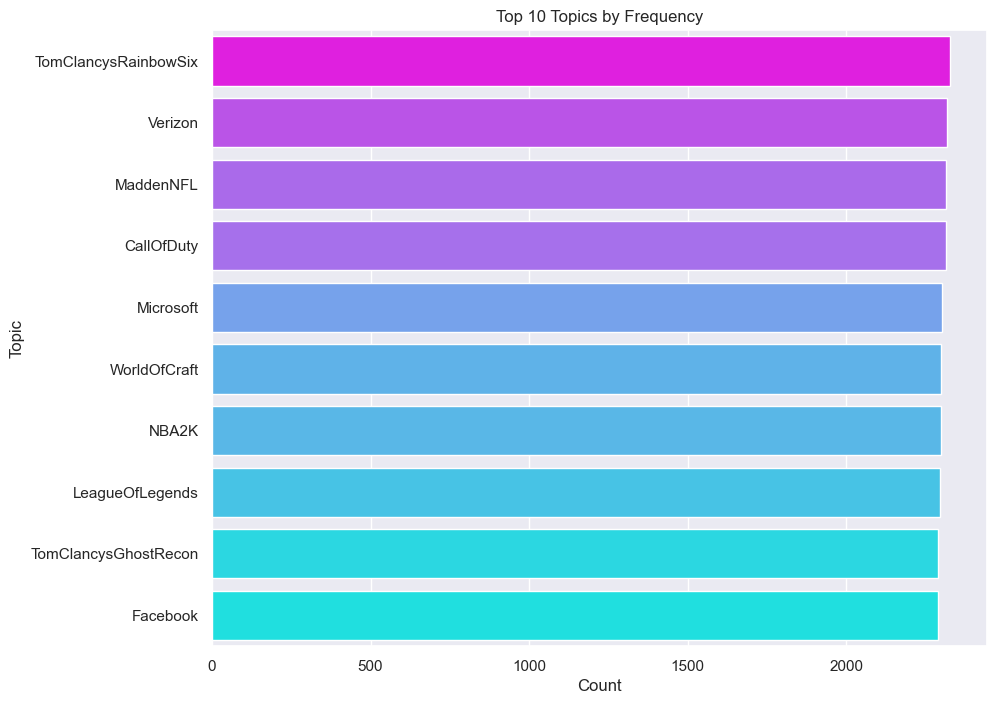

In [11]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df['Topic'].value_counts().values[:10],
            y=df['Topic'].value_counts().index[:10], hue=df['Topic'].value_counts().values[:10], legend=False, palette='cool')
plt.title('Top 10 Topics by Frequency')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

### 6A. Sentiment Distribution - Overall

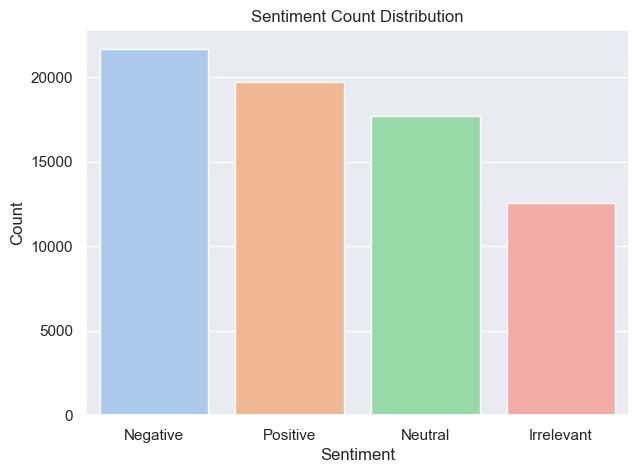

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sentiment', palette='pastel', legend=False,order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Count Distribution')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

### Pie Chart

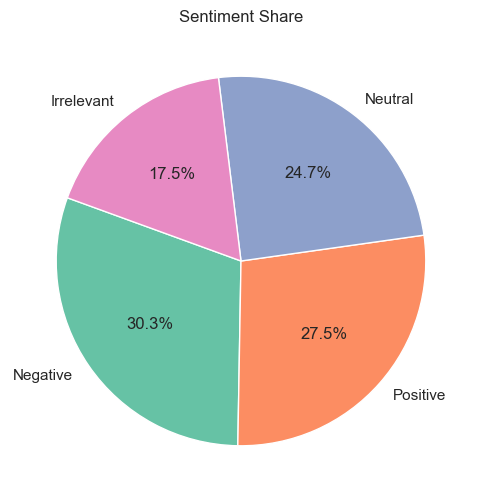

In [15]:
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('Set2'))
plt.title('Sentiment Share')
plt.show()

### 6B. Sentiment Distribution Topic-Wise

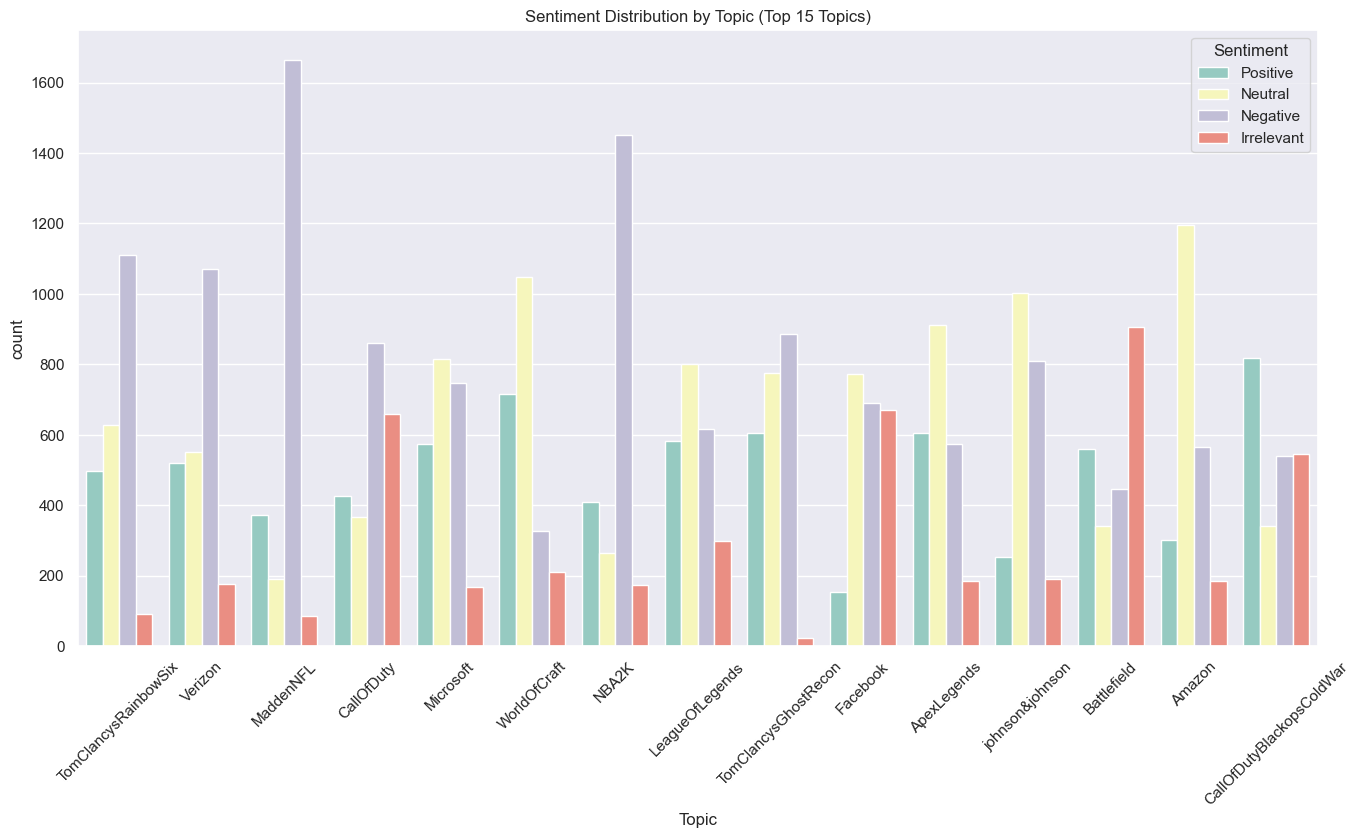

In [17]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Topic', hue='Sentiment', palette='Set3', order=df['Topic'].value_counts().index[:15])
plt.title('Sentiment Distribution by Topic (Top 15 Topics)')
plt.xticks(rotation=45)
plt.show()

### 6C. Top 5 Topics Analysis

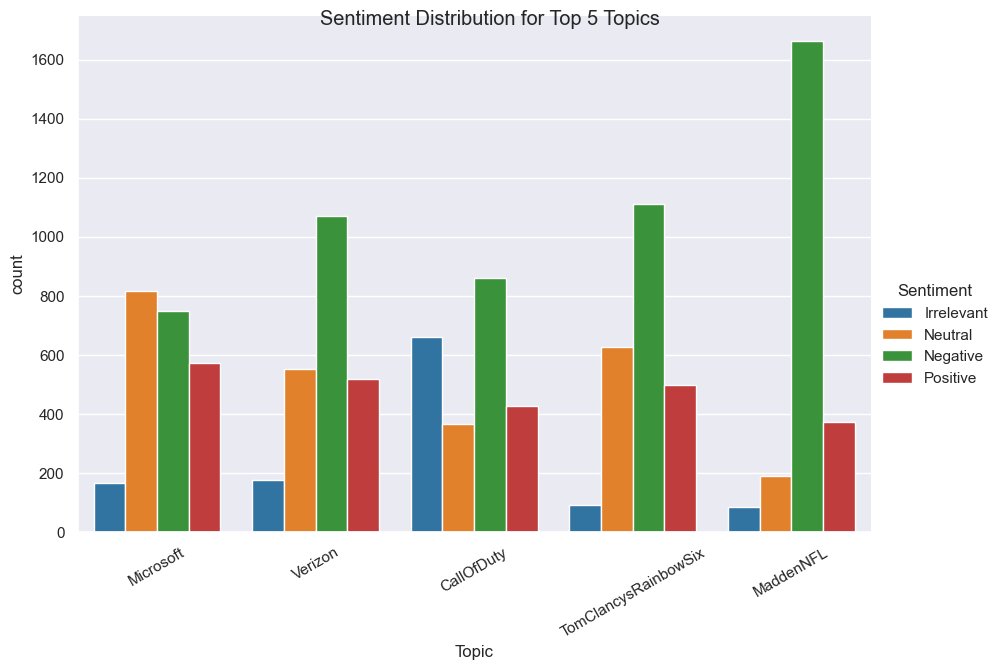

In [19]:
top_topics = df['Topic'].value_counts().nlargest(5).index
top_data = df[df['Topic'].isin(top_topics)]
g = sns.catplot(data=top_data, x='Topic', hue='Sentiment', kind='count', height=6, aspect=1.5, palette='tab10')
g.fig.suptitle('Sentiment Distribution for Top 5 Topics')
plt.xticks(rotation=30)
plt.show()

### 6D. Sentiment Analysis for Specific Brands

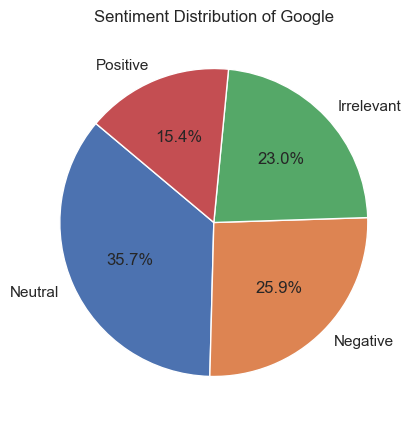

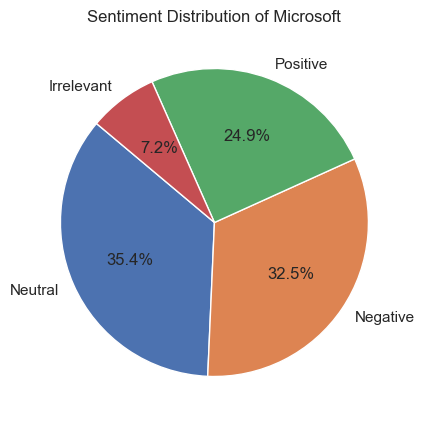

In [21]:
for brand in ['Google', 'Microsoft']:
    plt.figure(figsize=(5, 5))
    counts = df[df['Topic'] == brand] ['Sentiment'].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution of {brand}')
    plt.show()

### 6E. Message Length Analysis

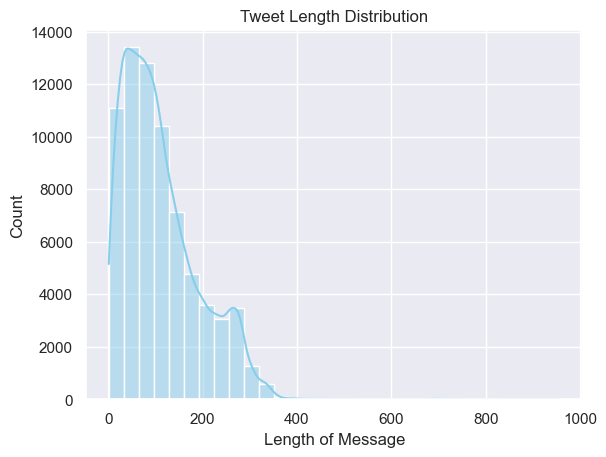

In [23]:
df['msg_len'] = df['Text'].apply(len)
sns.histplot(df['msg_len'], bins=30, kde=True, color='skyblue')
plt.title('Tweet Length Distribution')
plt.xlabel('Length of Message')
plt.show()

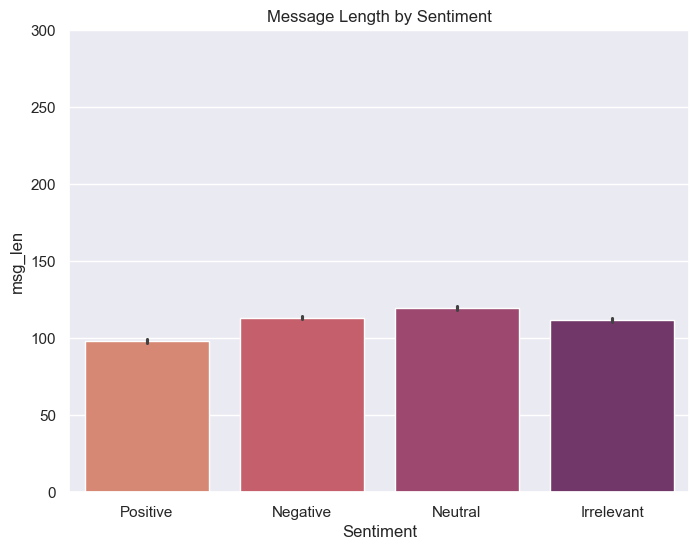

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Sentiment', y='msg_len', palette='flare', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length by Sentiment')
plt.ylim(0, 300)
plt.show()

### 6F. Heatmap of Topic vs Sentiment

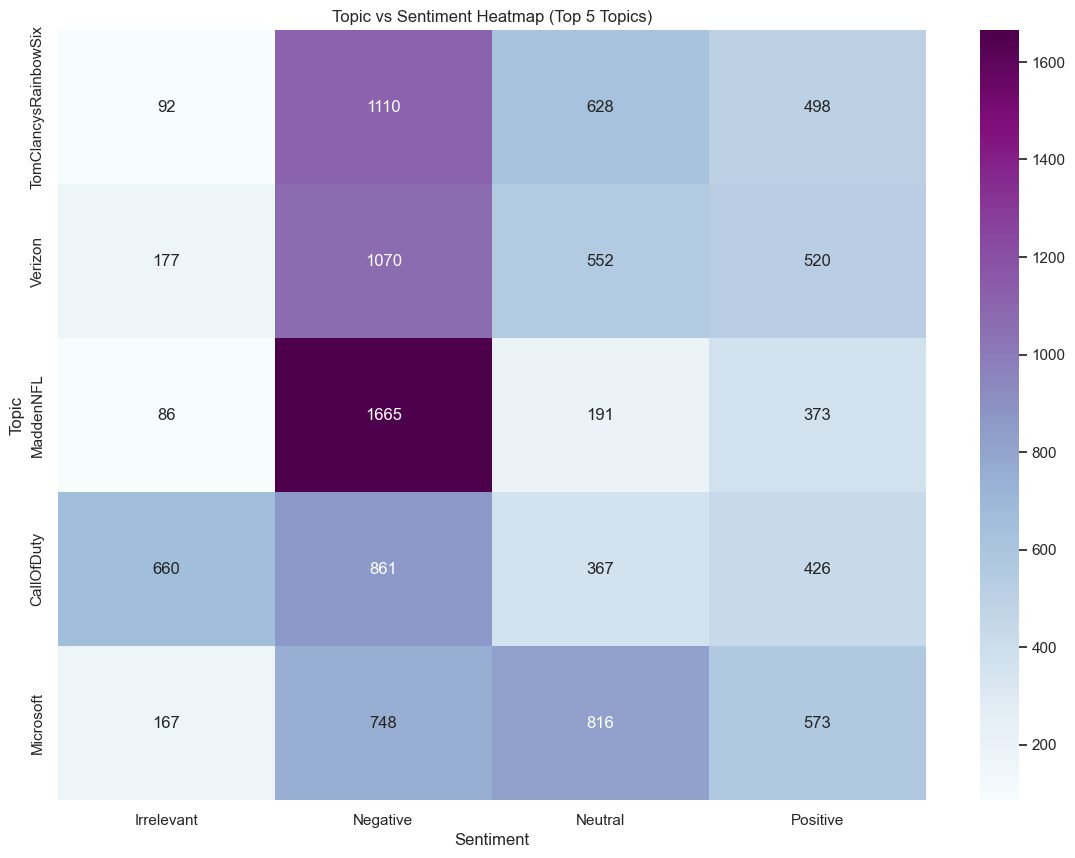

In [26]:
heat_data = pd.crosstab(df['Topic'], df['Sentiment'])
plt.figure(figsize=(14, 10))
sns.heatmap(heat_data.loc[top_topics], annot=True, fmt='d', cmap='BuPu')
plt.title('Topic vs Sentiment Heatmap (Top 5 Topics)')
plt.show()

### 6G. WordClouds

#### Topics WordCloud

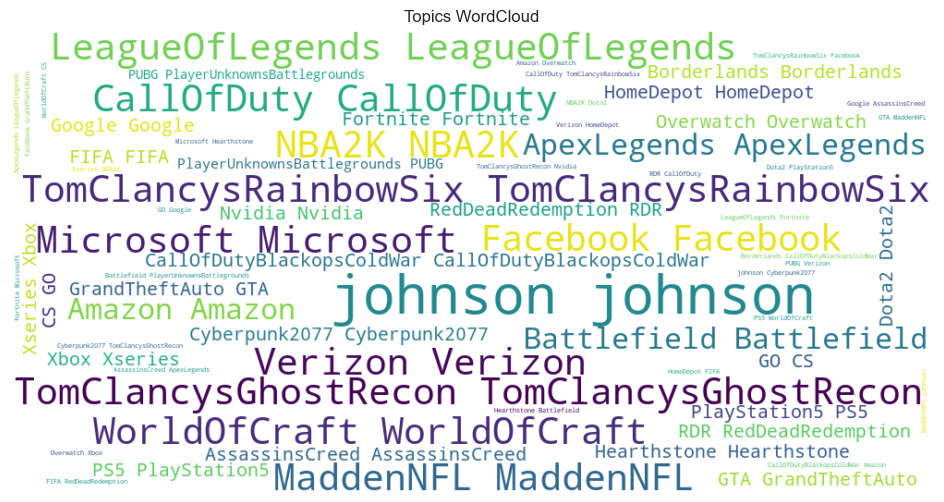

In [29]:
topic_text = ' '.join(df['Topic'].astype(str))
topic_wc = WordCloud(width=1000, height=500, background_color='white').generate(topic_text)
plt.figure(figsize=(14, 6))
plt.imshow(topic_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Topics WordCloud')
plt.show()

##### Tweets WordCloud

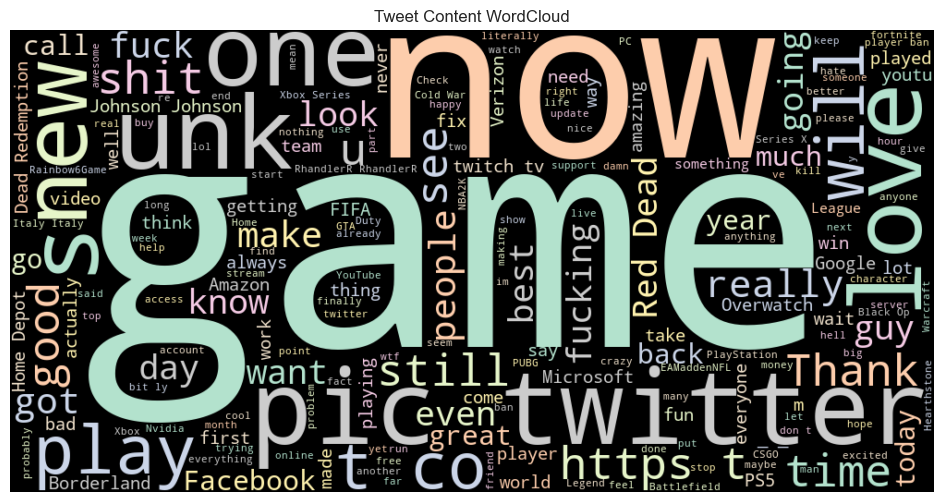

In [31]:
tweet_text = ' '.join(df['Text'].astype(str))
tweet_wc = WordCloud(width=1000, height=500, background_color='black', colormap='Pastel2').generate(tweet_text)
plt.figure(figsize=(14, 6))
plt.imshow(tweet_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Tweet Content WordCloud')
plt.show()

#### Top Words by Sentiment

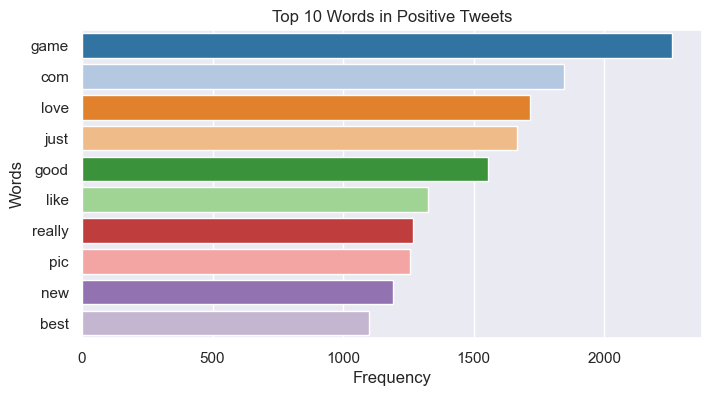

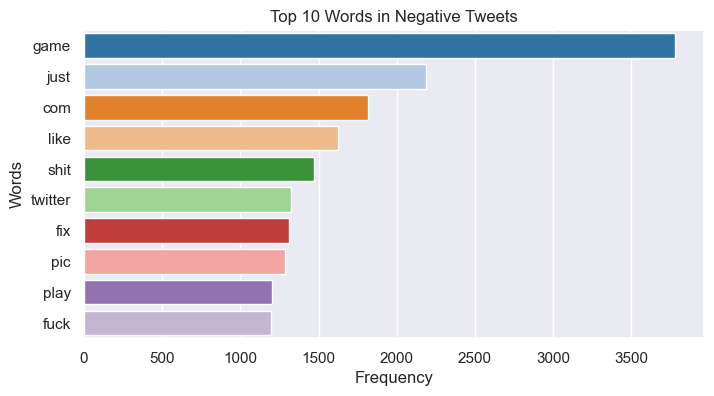

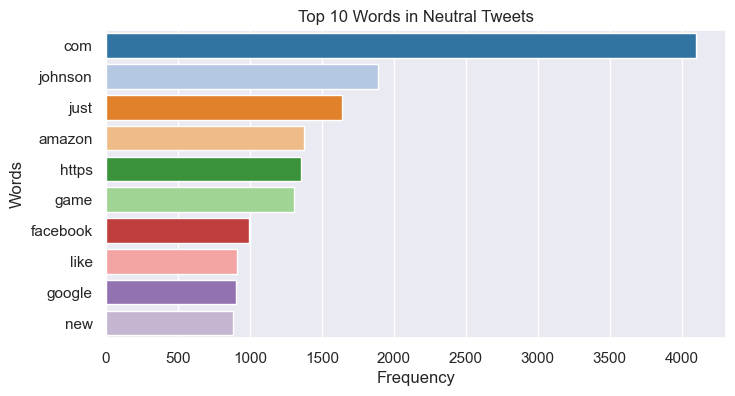

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

for sentiment in ['Positive', 'Negative', 'Neutral']:
    subset = df[df['Sentiment'] == sentiment]
    vec = CountVectorizer(stop_words='english')
    matrix = vec.fit_transform(subset['Text'])
    word_counts = np.asarray(matrix.sum(axis=0)).flatten()
    vocab = vec.get_feature_names_out()
    word_freq = dict(zip(vocab, word_counts))
    common_words = Counter(word_freq).most_common(10)
    words, counts = zip(*common_words)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(counts), y=list(words), palette='tab20')
    plt.title(f'Top 10 Words in {sentiment} Tweets')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

### CONCLUSION
Insights:
1. TomClancyRainbowSix appears as the most common topic.
2. Sentiment shares: ~30% Negative, ~27% Positive, ~25% Neutral, ~18% Irrelevant.
3. Google and Microsoft have a largely neutral sentiment distribution.
4. Tweet length typically falls under 300 characters.
5. Top words differ by sentiment, offering useful NLP features for modeling.